In [1]:
from similarityfunctions import *
from hypfunctions import *
import networkx as nx
from itertools import permutations, combinations
import pandas as pd

### Asia Tests

C:\Users\hanaa\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


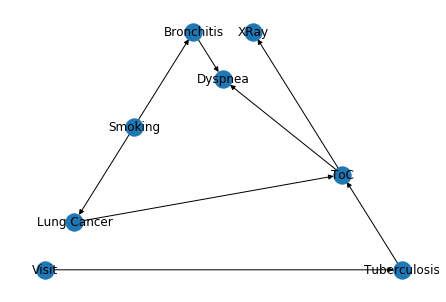

In [2]:
# make the graph
adg = nx.DiGraph()
adg.add_nodes_from(['Visit', 'Smoking', 'Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC', 'XRay',
                   'Dyspnea'])
adg.add_weighted_edges_from([('Visit','Tuberculosis', 0),('Tuberculosis','ToC', 0), 
                             ('ToC','XRay', 0), ('ToC', 'Dyspnea', 0),
                             ('Smoking','Bronchitis', 0), ('Smoking','Lung Cancer', 0), 
                             ('Bronchitis','Dyspnea', 0), ('Lung Cancer', 'ToC', 0)])

nx.draw_planar(adg, with_labels = True)

In [3]:
sorted(list(adg.nodes()))

['Bronchitis',
 'Dyspnea',
 'Lung Cancer',
 'Smoking',
 'ToC',
 'Tuberculosis',
 'Visit',
 'XRay']

In [4]:
bnodes = [node for node in list(adg.nodes()) if not list(adg.predecessors(node)) and list(adg.successors(node))] #root nodes
observations = [node for node in list(adg.nodes()) if not list(adg.successors(node)) and list(adg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(adg, observations, bnodes)
print(bnodes) 
print(observations) 
print(hypotheses)

['Visit', 'Smoking']
['XRay', 'Dyspnea']
[['Tuberculosis'], ['Lung Cancer'], ['ToC'], ['Tuberculosis', 'Lung Cancer'], ['Tuberculosis', 'Bronchitis'], ['Tuberculosis', 'ToC'], ['Lung Cancer', 'Bronchitis'], ['Lung Cancer', 'ToC'], ['Bronchitis', 'ToC'], ['Tuberculosis', 'Lung Cancer', 'Bronchitis'], ['Tuberculosis', 'Lung Cancer', 'ToC'], ['Tuberculosis', 'Bronchitis', 'ToC'], ['Lung Cancer', 'Bronchitis', 'ToC'], ['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC']]


In [5]:
# learn the CPTable

# Visit to Asia
cpt_V = CPT(0)
cpt_V.add_entry_self((.99, .01))
adg.nodes['Visit']['CPT'] = cpt_V

# Smoker
cpt_S = CPT(0)
cpt_S.add_entry_self((.5, .5))
adg.nodes['Smoking']['CPT'] = cpt_S

# Tuburculosis
cpt_T = CPT(1)
cpt_T.add_entry([1], (1-.05, .05))
cpt_T.add_entry([0], (1-.01, .01))
adg.nodes['Tuberculosis']['CPT'] = cpt_T

# Lung Cancer
cpt_L = CPT(1)
cpt_L.add_entry([1], (1-.1, .1))
cpt_L.add_entry([0], (1-.01, .01))
adg.nodes['Lung Cancer']['CPT'] = cpt_L

# Bronchitus
cpt_B = CPT(1)
cpt_B.add_entry([1], (1-.6, .6))
cpt_B.add_entry([0], (1-.3, .3))
adg.nodes['Bronchitis']['CPT'] = cpt_B

# Tub or Cancer
cpt_O = CPT(2)
cpt_O.add_entry([1, 1], (0, 1))
cpt_O.add_entry([1, 0], (0, 1))
cpt_O.add_entry([0, 1], (0, 1))
cpt_O.add_entry([0, 0], (1, 0))
adg.nodes['ToC']['CPT'] = cpt_O

# Dyspena
cpt_D = CPT(2)
cpt_D.add_entry([1, 1], (1-.9, .9))
cpt_D.add_entry([1, 0], (1-.8, .8))
cpt_D.add_entry([0, 1], (1-.7, .7))
cpt_D.add_entry([0, 0], (1-.1, .1))
adg.nodes['Dyspnea']['CPT'] = cpt_D

# Xray result
cpt_X = CPT(1)
cpt_X.add_entry([1], (1-.98, .98))
cpt_X.add_entry([0], (1-.05, .05))
adg.nodes['XRay']['CPT'] = cpt_X

In [6]:
# observe the data
observeData(adg, ['Smoking', 'XRay', 'Dyspnea'] ,['Visit'])

In [7]:
findBestExplanation(adg, observations, bnodes)

(['Tuberculosis'], 0.07255431642205015)
(['Lung Cancer'], 0.7255431642205016)
(['ToC'], 0.7908420490003467)
(['Tuberculosis', 'Lung Cancer'], 0.007255431642205017)
(['Tuberculosis', 'Bronchitis'], 0.047779671790130596)
(['Tuberculosis', 'ToC'], 0.07255431642205015)
(['Lung Cancer', 'Bronchitis'], 0.477796717901306)
(['Lung Cancer', 'ToC'], 0.7255431642205016)
(['Bronchitis', 'ToC'], 0.5207984225124235)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 0.004777967179013061)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 0.007255431642205017)
(['Tuberculosis', 'Bronchitis', 'ToC'], 0.047779671790130596)
(['Lung Cancer', 'Bronchitis', 'ToC'], 0.477796717901306)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 0.004777967179013061)


(['ToC'], 0.7908420490003467)

In [8]:
# calculate the total marginal probability (both ways)
findBestExplanation(adg, observations, bnodes, flipped=True)

(['Tuberculosis'], 0.8036000000000001)
(['Lung Cancer'], 0.8035999999999999)
(['ToC'], 0.8035999999999999)
(['Tuberculosis', 'Lung Cancer'], 0.8036000000000001)
(['Tuberculosis', 'Bronchitis'], 0.882)
(['Tuberculosis', 'ToC'], 0.8036000000000001)
(['Lung Cancer', 'Bronchitis'], 0.882)
(['Lung Cancer', 'ToC'], 0.8035999999999999)
(['Bronchitis', 'ToC'], 0.8819999999999999)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 0.882)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 0.8036000000000001)
(['Tuberculosis', 'Bronchitis', 'ToC'], 0.882)
(['Lung Cancer', 'Bronchitis', 'ToC'], 0.882)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 0.882)


(['Tuberculosis', 'Bronchitis'], 0.882)

# Generate new edges to create a common cause

Given that 'Tuberculosis or Cancer' is the best explanation, generate edges:
1. 'Visit to Asia' (the parent of 'Tuberculosis') --> 'Lung Cancer'  
2. 'Smoking' (the parent of 'Lung Cancer') --> 'Tuberculosis.

In [9]:
bnodes
observations

not_hyp = bnodes + observations
not_hyp

possibly_true = []
for i in range(1, len(not_hyp) + 1):
    possibly_true += [list(x) for x in it.combinations(not_hyp, i)]
    
print(possibly_true)

[['Visit'], ['Smoking'], ['XRay'], ['Dyspnea'], ['Visit', 'Smoking'], ['Visit', 'XRay'], ['Visit', 'Dyspnea'], ['Smoking', 'XRay'], ['Smoking', 'Dyspnea'], ['XRay', 'Dyspnea'], ['Visit', 'Smoking', 'XRay'], ['Visit', 'Smoking', 'Dyspnea'], ['Visit', 'XRay', 'Dyspnea'], ['Smoking', 'XRay', 'Dyspnea'], ['Visit', 'Smoking', 'XRay', 'Dyspnea']]


In [10]:
fbe1, fbe2 = {}, {}
true_false = []
for t in possibly_true:
    false_nodes = list(set(not_hyp) - set(t))
    true_false.append(false_nodes)
    observeData(adg, t, false_nodes)
    fbe1[tuple(t)] = findBestExplanation(adg, observations, bnodes)
    fbe2[tuple(t)] = findBestExplanation(adg, observations, bnodes, flipped=True)

(['Tuberculosis'], 0.0003891155622148363)
(['Lung Cancer'], 7.782311244296728e-05)
(['ToC'], 0.00046304751903565524)
(['Tuberculosis', 'Lung Cancer'], 3.891155622148364e-06)
(['Tuberculosis', 'Bronchitis'], 4.863944527685453e-05)
(['Tuberculosis', 'ToC'], 0.0003891155622148363)
(['Lung Cancer', 'Bronchitis'], 9.727889055370908e-06)
(['Lung Cancer', 'ToC'], 7.782311244296728e-05)
(['Bronchitis', 'ToC'], 5.78809398794569e-05)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 4.863944527685453e-07)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 3.891155622148364e-06)
(['Tuberculosis', 'Bronchitis', 'ToC'], 4.863944527685453e-05)
(['Lung Cancer', 'Bronchitis', 'ToC'], 9.727889055370908e-06)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 4.863944527685453e-07)
(['Tuberculosis'], 0.004800000000000003)
(['Lung Cancer'], 0.004800000000000005)
(['ToC'], 0.004800000000000004)
(['Tuberculosis', 'Lung Cancer'], 0.004800000000000005)
(['Tuberculosis', 'Bronchitis'], 0.0020000000000000013)
(['Tuberc

In [11]:
# best explanations before generated edge
from collections import Counter

fbe_result =[tuple(v[0]) for v in list(fbe1.values())]
fbe_count = dict(Counter(fbe_result))
    
print(fbe_count)
fbe1

{('ToC',): 15}


{('Visit',): (['ToC'], 0.00046304751903565524),
 ('Smoking',): (['ToC'], 0.0009648664677920502),
 ('XRay',): (['ToC'], 0.12159007926704289),
 ('Dyspnea',): (['ToC'], 0.0010468539474350444),
 ('Visit', 'Smoking'): (['ToC'], 0.0013370833141223672),
 ('Visit', 'XRay'): (['ToC'], 0.30133296297612167),
 ('Visit', 'Dyspnea'): (['ToC'], 0.0032546229662879893),
 ('Smoking', 'XRay'): (['ToC'], 0.47345093520077997),
 ('Smoking', 'Dyspnea'): (['ToC'], 0.004044878327815263),
 ('XRay', 'Dyspnea'): (['ToC'], 0.4938355189922258),
 ('Visit', 'Smoking', 'XRay'): (['ToC'], 0.5548613822725497),
 ('Visit', 'Smoking', 'Dyspnea'): (['ToC'], 0.005598613766280247),
 ('Visit', 'XRay', 'Dyspnea'): (['ToC'], 0.7524720532963399),
 ('Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.7908420490003467),
 ('Visit', 'Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.8397860931734318)}

In [12]:
fbe2_result = [tuple(v[0]) for v in list(fbe2.values())]
fbe2_count = dict(Counter(fbe2_result))

print(fbe2_count)
fbe2

{('Lung Cancer',): 2, ('Tuberculosis',): 5, ('Lung Cancer', 'Bronchitis'): 2, ('Tuberculosis', 'Bronchitis'): 5, ('Bronchitis', 'ToC'): 1}


{('Visit',): (['Lung Cancer'], 0.004800000000000005),
 ('Smoking',): (['Tuberculosis'], 0.0036000000000000042),
 ('XRay',): (['Tuberculosis'], 0.23520000000000002),
 ('Dyspnea',): (['Lung Cancer', 'Bronchitis'], 0.01800000000000002),
 ('Visit', 'Smoking'): (['Tuberculosis'], 0.0036000000000000034),
 ('Visit', 'XRay'): (['Lung Cancer'], 0.23520000000000002),
 ('Visit', 'Dyspnea'): (['Tuberculosis', 'Bronchitis'], 0.01800000000000002),
 ('Smoking', 'XRay'): (['Tuberculosis'], 0.1764),
 ('Smoking', 'Dyspnea'): (['Tuberculosis', 'Bronchitis'], 0.01800000000000002),
 ('XRay', 'Dyspnea'): (['Lung Cancer', 'Bronchitis'], 0.882),
 ('Visit', 'Smoking', 'XRay'): (['Tuberculosis'], 0.1764),
 ('Visit', 'Smoking', 'Dyspnea'): (['Tuberculosis', 'Bronchitis'],
  0.01800000000000002),
 ('Visit', 'XRay', 'Dyspnea'): (['Bronchitis', 'ToC'], 0.8820000000000001),
 ('Smoking', 'XRay', 'Dyspnea'): (['Tuberculosis', 'Bronchitis'], 0.882),
 ('Visit', 'Smoking', 'XRay', 'Dyspnea'): (['Tuberculosis', 'Bronchiti

In [13]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
original_data = {}
original_data['True Nodes'] = possibly_true
original_data['False Nodes'] = true_false
original_data['Best Explanation'] = [v[0] for v in list(fbe1.values())]
original_data['Prob. of best expl.'] = [v[1] for v in list(fbe1.values())]
original_data['Best Explanation (flipped)'] = [v[0] for v in list(fbe2.values())]
original_data['Prob. of best expl. (flipped)'] = [v[1] for v in list(fbe2.values())]

df1 = pd.DataFrame(original_data, columns=list(original_data.keys()))
df1

,True Nodes,False Nodes,Best Explanation,Prob. of best expl.,Best Explanation (flipped),Prob. of best expl. (flipped)
0,[Visit],"[XRay, Dyspnea, Smoking]",[ToC],0.000463,[Lung Cancer],0.0048
1,[Smoking],"[XRay, Dyspnea, Visit]",[ToC],0.000965,[Tuberculosis],0.0036
2,[XRay],"[Dyspnea, Visit, Smoking]",[ToC],0.121590,[Tuberculosis],0.2352
3,[Dyspnea],"[XRay, Visit, Smoking]",[ToC],0.001047,"[Lung Cancer, Bronchitis]",0.0180
4,"[Visit, Smoking]","[XRay, Dyspnea]",[ToC],0.001337,[Tuberculosis],0.0036
5,"[Visit, XRay]","[Dyspnea, Smoking]",[ToC],0.301333,[Lung Cancer],0.2352
6,"[Visit, Dyspnea]","[XRay, Smoking]",[ToC],0.003255,"[Tuberculosis, Bronchitis]",0.0180
7,"[Smoking, XRay]","[Dyspnea, Visit]",[ToC],0.473451,[Tuberculosis],0.1764
8,"[Smoking, Dyspnea]","[XRay, Visit]",[ToC],0.004045,"[Tuberculosis, Bronchitis]",0.0180
9,"[XRay, Dyspnea]","[Visit, Smoking]",[ToC],0.493836,"[Lung Cancer, Bronchitis]",0.8820


### Generate the new edges

In [14]:
# generate edge so that final output is either T or C
for i in list(fbe1.items()):
    hyp = i[1][0]
    true_bnode = list(set(i[0]) & set(bnodes))
    #if (hyp == ['ToC']):
    if (true_bnode == ['Visit']) and ('Smoking' not in i[0]): 
        adg.add_edge('Visit', 'Lung Cancer', weight=0)
    elif (true_bnode == ['Smoking']) and ('Visit' not in i[0]): 
        adg.add_edge('Smoking', 'Tuberculosis', weight=0)

nx.is_directed_acyclic_graph(adg)

True

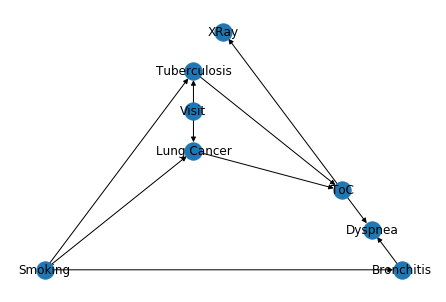

In [15]:
nx.draw_planar(adg, with_labels=True)

In [16]:
# learn CPT table for new graph
# learn the CPTable

# Visit to Asia
cpt_V = CPT(0)
cpt_V.add_entry_self((.99, .01))
adg.nodes['Visit']['CPT'] = cpt_V

# Smoker
cpt_S = CPT(0)
cpt_S.add_entry_self((.5, .5))
adg.nodes['Smoking']['CPT'] = cpt_S

# Tuburculosis
cpt_T = CPT(2)
cpt_T.add_entry([1, 1], (1-.404741, .404741))
cpt_T.add_entry([1, 0], (1-.737703, .737703))
cpt_T.add_entry([0, 1], (1-0.550929, 0.550929))
cpt_T.add_entry([0, 0], (1-.850972, .850972))
adg.nodes['Tuberculosis']['CPT'] = cpt_T

# Lung Cancer
cpt_L = CPT(2)
cpt_L.add_entry([1, 1], (1-.820109, 0.820109))
cpt_L.add_entry([1, 0], (1-.652432, 0.652432))
cpt_L.add_entry([0, 1], (1-.940742, 0.940742))
cpt_L.add_entry([0, 0], (1-.503528, 0.503528))
adg.nodes['Lung Cancer']['CPT'] = cpt_L

# Bronchitus
cpt_B = CPT(1)
cpt_B.add_entry([1], (1-.6, .6))
cpt_B.add_entry([0], (1-.3, .3))
adg.nodes['Bronchitis']['CPT'] = cpt_B

# Tub or Cancer
cpt_O = CPT(2)
cpt_O.add_entry([1, 1], (0, 1))
cpt_O.add_entry([1, 0], (0, 1))
cpt_O.add_entry([0, 1], (0, 1))
cpt_O.add_entry([0, 0], (1, 0))
adg.nodes['ToC']['CPT'] = cpt_O

# Dyspena
cpt_D = CPT(2)
cpt_D.add_entry([1, 1], (1-.647579, .647579))
cpt_D.add_entry([1, 0], (1-.612748, .612748))
cpt_D.add_entry([0, 1], (1-.972355, .972355))
cpt_D.add_entry([0, 0], (1-.277294, .277294))
adg.nodes['Dyspnea']['CPT'] = cpt_D

# Xray result
cpt_X = CPT(1)
cpt_X.add_entry([1], (1-.98, .98))
cpt_X.add_entry([0], (1-.05, .05))
adg.nodes['XRay']['CPT'] = cpt_X

In [17]:
# observe the data
observeData(adg, ['Smoking', 'XRay', 'Dyspnea'],['Visit'])

In [18]:
findBestExplanation(adg, observations, bnodes)

(['Tuberculosis'], 0.8091537178866078)
(['Lung Cancer'], 0.7156237381008282)
(['ToC'], 0.9968596775192407)
(['Tuberculosis', 'Lung Cancer'], 0.5279177784681952)
(['Tuberculosis', 'Bronchitis'], 0.4043715236312867)
(['Tuberculosis', 'ToC'], 0.8091537178866078)
(['Lung Cancer', 'Bronchitis'], 0.35763026842212603)
(['Lung Cancer', 'ToC'], 0.7156237381008282)
(['Bronchitis', 'ToC'], 0.49817687014760503)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 0.26382492190580764)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 0.5279177784681952)
(['Tuberculosis', 'Bronchitis', 'ToC'], 0.4043715236312867)
(['Lung Cancer', 'Bronchitis', 'ToC'], 0.35763026842212603)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 0.26382492190580764)


(['ToC'], 0.9968596775192407)

In [19]:
findBestExplanation(adg, observations, bnodes, flipped=True)

(['Tuberculosis'], 0.7619396120000002)
(['Lung Cancer'], 0.7619396119999999)
(['ToC'], 0.7619396119999999)
(['Tuberculosis', 'Lung Cancer'], 0.7619396119999999)
(['Tuberculosis', 'Bronchitis'], 0.63462742)
(['Tuberculosis', 'ToC'], 0.7619396120000002)
(['Lung Cancer', 'Bronchitis'], 0.6346274199999999)
(['Lung Cancer', 'ToC'], 0.7619396119999999)
(['Bronchitis', 'ToC'], 0.6346274199999999)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 0.63462742)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 0.7619396119999999)
(['Tuberculosis', 'Bronchitis', 'ToC'], 0.63462742)
(['Lung Cancer', 'Bronchitis', 'ToC'], 0.6346274199999999)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 0.63462742)


(['Tuberculosis'], 0.7619396120000002)

### Gather new data

In [20]:
# reassign bnodes, obs, and hyp
bnodes = [node for node in list(adg.nodes()) if not list(adg.predecessors(node)) and list(adg.successors(node))] #root nodes
observations = [node for node in list(adg.nodes()) if not list(adg.successors(node)) and list(adg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(adg, observations, bnodes)

In [21]:
# generate FBE data for eupdated graph
not_hyp = bnodes + observations
possibly_true = []
for i in range(1, len(not_hyp) + 1):
    possibly_true += [list(x) for x in it.combinations(not_hyp, i)]
possibly_true

fbe1_new, fbe2_new = {}, {}
true_false2 = []
for t in possibly_true:
    false_nodes = list(set(not_hyp) - set(t))
    observeData(adg, t, false_nodes)
    true_false2.append(false_nodes)
    fbe1_new[tuple(t)] = findBestExplanation(adg, observations, bnodes)
    fbe2_new[tuple(t)] = findBestExplanation(adg, observations, bnodes, flipped=True)

(['Tuberculosis'], 0.07588585462352805)
(['Lung Cancer'], 0.12957932991410331)
(['ToC'], 0.13407617388738435)
(['Tuberculosis', 'Lung Cancer'], 0.07138901065024703)
(['Tuberculosis', 'Bronchitis'], 0.06414512113007674)
(['Tuberculosis', 'ToC'], 0.07588585462352805)
(['Lung Cancer', 'Bronchitis'], 0.1095313725401107)
(['Lung Cancer', 'ToC'], 0.12957932991410331)
(['Bronchitis', 'ToC'], 0.11333248412803679)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis'], 0.060344009542150655)
(['Tuberculosis', 'Lung Cancer', 'ToC'], 0.07138901065024703)
(['Tuberculosis', 'Bronchitis', 'ToC'], 0.06414512113007674)
(['Lung Cancer', 'Bronchitis', 'ToC'], 0.1095313725401107)
(['Tuberculosis', 'Lung Cancer', 'Bronchitis', 'ToC'], 0.060344009542150655)
(['Tuberculosis'], 0.0025015560000000033)
(['Lung Cancer'], 0.002501556000000003)
(['ToC'], 0.0025015560000000024)
(['Tuberculosis', 'Lung Cancer'], 0.002501556000000003)
(['Tuberculosis', 'Bronchitis'], 0.007048420000000006)
(['Tuberculosis', 'ToC'], 0.00250155

In [22]:
new_fbe1_result =[tuple(v[0]) for v in list(fbe1_new.values())]
new_fbe1_count = dict(Counter(new_fbe1_result))

print(new_fbe1_count)
fbe1_new

{('ToC',): 15}


{('Visit',): (['ToC'], 0.13407617388738435),
 ('Smoking',): (['ToC'], 0.08219752548121569),
 ('XRay',): (['ToC'], 0.9801284414495528),
 ('Dyspnea',): (['ToC'], 0.3788756305001538),
 ('Visit', 'Smoking'): (['ToC'], 0.06969173271123692),
 ('Visit', 'XRay'): (['ToC'], 0.9931106848017279),
 ('Visit', 'Dyspnea'): (['ToC'], 0.6406422925540499),
 ('Smoking', 'XRay'): (['ToC'], 0.9881487778869728),
 ('Smoking', 'Dyspnea'): (['ToC'], 0.25426851196000916),
 ('XRay', 'Dyspnea'): (['ToC'], 0.9982422053288232),
 ('Visit', 'Smoking', 'XRay'): (['ToC'], 0.9858644361270424),
 ('Visit', 'Smoking', 'Dyspnea'): (['ToC'], 0.2219131501264029),
 ('Visit', 'XRay', 'Dyspnea'): (['ToC'], 0.9993978563774801),
 ('Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.9968596775192407),
 ('Visit', 'Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.996248000094761)}

In [23]:
new_fbe2_result = [tuple(v[0]) for v in list(fbe2_new.values())]
new_fbe2_count = dict(Counter(new_fbe2_result))

print(new_fbe2_count)
fbe2_new

{('Lung Cancer', 'Bronchitis'): 1, ('Tuberculosis', 'Bronchitis'): 2, ('Tuberculosis', 'Lung Cancer', 'Bronchitis'): 2, ('ToC',): 3, ('Bronchitis', 'ToC'): 2, ('Tuberculosis',): 4, ('Tuberculosis', 'Lung Cancer'): 1}


{('Visit',): (['Lung Cancer', 'Bronchitis'], 0.007048420000000007),
 ('Smoking',): (['Tuberculosis', 'Bronchitis'], 0.007048420000000006),
 ('XRay',): (['Tuberculosis', 'Lung Cancer', 'Bronchitis'],
  0.3453725800000001),
 ('Dyspnea',): (['ToC'], 0.01749844400000002),
 ('Visit', 'Smoking'): (['Tuberculosis', 'Bronchitis'], 0.007048420000000007),
 ('Visit', 'XRay'): (['Bronchitis', 'ToC'], 0.3453725800000001),
 ('Visit', 'Dyspnea'): (['Tuberculosis'], 0.01749844400000002),
 ('Smoking', 'XRay'): (['Tuberculosis', 'Lung Cancer', 'Bronchitis'],
  0.34537258),
 ('Smoking', 'Dyspnea'): (['ToC'], 0.015549788000000016),
 ('XRay', 'Dyspnea'): (['ToC'], 0.8574237560000001),
 ('Visit', 'Smoking', 'XRay'): (['Bronchitis', 'ToC'], 0.34537258000000004),
 ('Visit', 'Smoking', 'Dyspnea'): (['Tuberculosis', 'Lung Cancer'],
  0.015549788000000014),
 ('Visit', 'XRay', 'Dyspnea'): (['Tuberculosis'], 0.8574237560000001),
 ('Smoking', 'XRay', 'Dyspnea'): (['Tuberculosis'], 0.7619396120000002),
 ('Visit', 'S

In [24]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
new_data = {}
new_data['True Nodes'] = possibly_true
new_data['False Nodes'] = true_false2
new_data['Best Explanation'] = [v[0] for v in list(fbe1_new.values())]
new_data['Prob. of best expl.'] = [v[1] for v in list(fbe1_new.values())]
new_data['Best Explanation (flipped)'] = [v[0] for v in list(fbe2_new.values())]
new_data['Prob. of best expl. (flipped)'] = [v[1] for v in list(fbe2_new.values())]

df2 = pd.DataFrame(new_data, columns=list(new_data.keys()))
df2

,True Nodes,False Nodes,Best Explanation,Prob. of best expl.,Best Explanation (flipped),Prob. of best expl. (flipped)
0,[Visit],"[XRay, Dyspnea, Smoking]",[ToC],0.134076,"[Lung Cancer, Bronchitis]",0.007048
1,[Smoking],"[XRay, Dyspnea, Visit]",[ToC],0.082198,"[Tuberculosis, Bronchitis]",0.007048
2,[XRay],"[Dyspnea, Visit, Smoking]",[ToC],0.980128,"[Tuberculosis, Lung Cancer, Bronchitis]",0.345373
3,[Dyspnea],"[XRay, Visit, Smoking]",[ToC],0.378876,[ToC],0.017498
4,"[Visit, Smoking]","[XRay, Dyspnea]",[ToC],0.069692,"[Tuberculosis, Bronchitis]",0.007048
5,"[Visit, XRay]","[Dyspnea, Smoking]",[ToC],0.993111,"[Bronchitis, ToC]",0.345373
6,"[Visit, Dyspnea]","[XRay, Smoking]",[ToC],0.640642,[Tuberculosis],0.017498
7,"[Smoking, XRay]","[Dyspnea, Visit]",[ToC],0.988149,"[Tuberculosis, Lung Cancer, Bronchitis]",0.345373
8,"[Smoking, Dyspnea]","[XRay, Visit]",[ToC],0.254269,[ToC],0.015550
9,"[XRay, Dyspnea]","[Visit, Smoking]",[ToC],0.998242,[ToC],0.857424


# Functionality

In [25]:
# Adapted from Meg's to only output the highest probability explanation.
def findBestExplanation(graph, observed_nodes, bnodes, flipped=False):
    hyps = findHypotheses(graph, observed_nodes, bnodes)
    current_best = (None, 0)
    for i in hyps:
        if isinstance(i, list): 
            for x in i:
                graph.nodes[x]['value'] = 1
            if flipped:
                prob = calculateTotalMarginalProbabilityObs(graph, list(i), observed_nodes, bnodes)
            else:
                prob = calculateTotalMarginalProbability(graph, list(i), observed_nodes, bnodes)
            for x in i:
                graph.nodes[x]['value'] = None
        else:
            graph.nodes[i]['value'] = 1
            if flipped:
                prob = calculateTotalMarginalProbabilityObs(graph, list(i), observed_nodes, bnodes)
            else:
                prob = calculateTotalMarginalProbability(graph, list(i), observed_nodes, bnodes)
            graph.nodes[i]['value'] = None
        if prob > current_best[1]:
            current_best = (i, prob)
    return current_best

In [26]:
def get_all_FBE(graph, observations, bnodes, flipped=False):
    hypotheses = findHypotheses(graph, observations, bnodes)
    not_hyp = bnodes + observations
    possibly_true = []
    for i in range(1, len(not_hyp) + 1):
        possibly_true += [list(x) for x in it.combinations(not_hyp, i)]
    possibly_true

    fbe = {}
    for t in possibly_true:
        false_nodes = list(set(not_hyp) - set(t))
        observeData(adg, t, false_nodes)
        if (flipped == False): fbe[tuple(t)] = findBestExplanation(adg, observations, bnodes)
        elif (flipped==True): fbe[tuple(t)] = findBestExplanation(adg, observations, bnodes, flipped=True)
    
    return fbe

In [27]:
get_all_FBE(adg, observations, bnodes)

{('Visit',): (['ToC'], 0.13407617388738435),
 ('Smoking',): (['ToC'], 0.08219752548121569),
 ('XRay',): (['ToC'], 0.9801284414495528),
 ('Dyspnea',): (['ToC'], 0.3788756305001538),
 ('Visit', 'Smoking'): (['ToC'], 0.06969173271123692),
 ('Visit', 'XRay'): (['ToC'], 0.9931106848017279),
 ('Visit', 'Dyspnea'): (['ToC'], 0.6406422925540499),
 ('Smoking', 'XRay'): (['ToC'], 0.9881487778869728),
 ('Smoking', 'Dyspnea'): (['ToC'], 0.25426851196000916),
 ('XRay', 'Dyspnea'): (['ToC'], 0.9982422053288232),
 ('Visit', 'Smoking', 'XRay'): (['ToC'], 0.9858644361270424),
 ('Visit', 'Smoking', 'Dyspnea'): (['ToC'], 0.2219131501264029),
 ('Visit', 'XRay', 'Dyspnea'): (['ToC'], 0.9993978563774801),
 ('Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.9968596775192407),
 ('Visit', 'Smoking', 'XRay', 'Dyspnea'): (['ToC'], 0.996248000094761)}

In [28]:
# data to Excel
with pd.ExcelWriter(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\asia-data-commoncause.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Before Edge Generation')
    df2.to_excel(writer, sheet_name='After Edge Generation')